In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Part 1
Getting top 15 countries data.

In [2]:
Energy = pd.read_excel('inputs/Energy Indicators.xls', skiprows=17, skipfooter=283-246+1).iloc[:,2:]

Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
Energy = Energy.replace('...', np.nan)
Energy['Energy Supply'] = Energy['Energy Supply'].apply(lambda x: x*1_000_000)
names = {"Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"}
Energy['Country'] = Energy['Country'].replace({r' \(.*\)': '', '\d+': ''}, regex=True).apply(lambda x: names[x] if x in names else x)
    
Energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28.0,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
224,Yemen,3.440000e+08,13.0,0.000000
225,Zambia,4.000000e+08,26.0,99.714670


In [3]:
GDP = pd.read_csv('inputs/world_bank.csv', skiprows=3, header=1).rename({'Country Name': 'Country'}, axis=1)

names = {"Korea, Rep.": "South Korea",  "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"}
GDP['Country'] = GDP['Country'].apply(lambda x: names[x] if x in names else x)
GDP = GDP.drop(list(map(str, range(1960, 2006))),axis=1)

GDP

,Country,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"Yemen, Rep.",YEM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,2.672565e+10,2.761787e+10,2.872656e+10,2.991436e+10,3.090675e+10,2.624342e+10,2.689160e+10,2.800914e+10,NaN,NaN
260,South Africa,ZAF,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,3.402852e+11,3.585261e+11,3.699668e+11,3.642764e+11,3.753494e+11,3.874074e+11,3.960071e+11,4.047682e+11,4.110369e+11,4.163117e+11
261,"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10
262,Zambia,ZMB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.440569e+10,1.560892e+10,1.682234e+10,1.837342e+10,2.026555e+10,2.140358e+10,2.302438e+10,2.420595e+10,2.542227e+10,2.624127e+10


In [4]:
ScimEn = pd.read_excel('inputs/scimagojr-3.xlsx')
ScimEn

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


In [5]:
merged = Energy.merge(GDP.merge(ScimEn, how='inner', on='Country'), how='inner', on='Country')
merged = merged.set_index('Country')

merged = merged[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document',
                    'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable',
                    '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

merge = merged[merged['Rank'] <= 15].sort_values('Rank')
merge

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


# Part 2
Calculating the number of lost entires due to the merge.

In [6]:
inter = Energy.merge(GDP.merge(ScimEn, how='inner', on='Country'), how='inner', on='Country')
union = Energy.merge(GDP.merge(ScimEn, how='outer', on='Country'), how='outer', on='Country')

len(union) - len(inter)

158

# Part 3
Sorting top 15 countries by their average GDP over the last 10 years.

In [7]:
df = merged.copy()
df['avgGDP'] = df.loc[:, '2006':'2015'].apply(lambda x: x.mean(),axis=1)
df = df.sort_values('avgGDP', ascending=False)

df['avgGDP']

Country
United States           1.536434e+13
China                   6.348609e+12
Japan                   5.542208e+12
Germany                 3.493025e+12
France                  2.681725e+12
                            ...     
Gibraltar                        NaN
Myanmar                          NaN
Nauru                            NaN
New Caledonia                    NaN
Syrian Arab Republic             NaN
Name: avgGDP, Length: 161, dtype: float64

# Part 4
Calculating the change of the sixth largest country by average GDP over the 10 year span.

In [8]:
df = df.iloc[5]
df['2015'] - df['2006']

np.float64(246702696075.3999)

# Part 5
Calculating the mean of energy supply per capita.

In [9]:
merged['Energy Supply per Capita'].mean()

np.float64(101.125)

# Part 6
Getting the country with maximum % Renewable.

In [10]:
df = merged.copy()
df = df.sort_values('% Renewable', ascending=False)
country = df.iloc[0]
(country.name, country['% Renewable'])

('Albania', np.float64(100.0))

# Part 7
Creating a new column, the ratio of Self-Citations to Total Citations, and getting the country with the highest ratio.

In [11]:
merged['Self-citations ratio'] = merged['Self-citations'] / merged['Citations']
merged = merged.sort_values('Self-citations ratio', ascending=False)
country = merged.iloc[0]
(country.name, country['Self-citations ratio'])

('China', np.float64(0.6893126179389422))

# Part 8
Creating a new column, the estimates the population, using Energy Supply and Energy Supply per capita, and getting the country with the highest population.

In [12]:
popEst = merged.copy()
popEst['PopEst'] = df['Energy Supply'] / df['Energy Supply per Capita']

popEst.sort_values('PopEst', ascending=False).iloc[2].name

'United States'

# Part 10
Creating a new column, the estimates the number of citable documents per person, and finding the correlation between the number of citable documents per capita and the energy supply per capita.

In [13]:
df = popEst
df['Citable documents per Person'] = df['Citable documents'] / df['PopEst']
df['Citable documents per Person'].corr(df['Energy Supply per Capita'])

np.float64(0.5181541635458505)

<Axes: xlabel='Citable docs per Capita', ylabel='Energy Supply per Capita'>

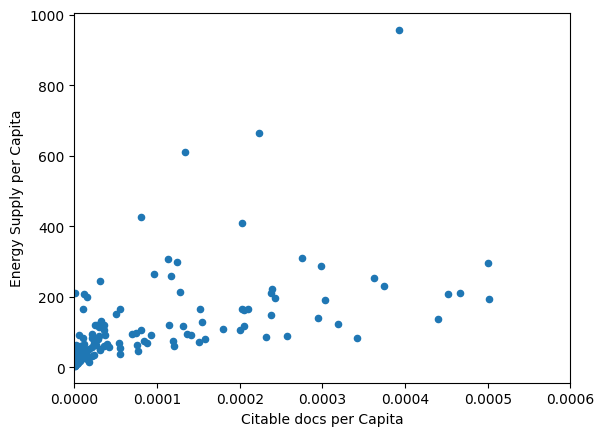

In [15]:
import matplotlib as plt
%matplotlib inline

Top15 = merged.copy()
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

# Part 11
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

In [16]:
median = merged['% Renewable'].median()
merged['% Renewable'].apply(lambda x: 1 if x >= median else 0)

Country
China                 0
Estonia               0
Tajikistan            1
Armenia               1
Russian Federation    0
                     ..
Honduras              1
Mali                  1
Nauru                 0
Palau                 0
Togo                  1
Name: % Renewable, Length: 161, dtype: int64

# Part 12
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

In [17]:
ContinentDict = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
def answer_eleven():
    # YOUR CODE HERE
    
    df = popEst
    df = df['PopEst'].groupby(ContinentDict).agg(('size', 'sum', 'mean', 'std'))
    df.index.name = 'Continent'
    return df
    # raise NotImplementedError()
answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


# Part 13
Cutting % Renewable into 5 bins, and grouping Top15 by the Continent and the bins.

In [18]:
renewable = merged.copy()['% Renewable']
bins = pd.cut(renewable, 5)
renewable = renewable.groupby([ContinentDict, bins]).size()
renewable.index.names = ['Continent', '% Renewable']
renewable

Continent      % Renewable  
Asia           (-0.1, 20.0]     5
               (20.0, 40.0]     0
               (40.0, 60.0]     0
               (60.0, 80.0]     0
               (80.0, 100.0]    0
Australia      (-0.1, 20.0]     1
               (20.0, 40.0]     0
               (40.0, 60.0]     0
               (60.0, 80.0]     0
               (80.0, 100.0]    0
Europe         (-0.1, 20.0]     4
               (20.0, 40.0]     2
               (40.0, 60.0]     0
               (60.0, 80.0]     0
               (80.0, 100.0]    0
North America  (-0.1, 20.0]     1
               (20.0, 40.0]     0
               (40.0, 60.0]     0
               (60.0, 80.0]     1
               (80.0, 100.0]    0
South America  (-0.1, 20.0]     0
               (20.0, 40.0]     0
               (40.0, 60.0]     0
               (60.0, 80.0]     1
               (80.0, 100.0]    0
Name: % Renewable, dtype: int64

# Part 14
Formatting population thousands.

In [19]:
df = popEst.copy()
df['PopEst'] = df['PopEst'].apply(lambda x: f'{x:,}')
df['PopEst']

Country
China                 1,367,645,161.2903225
Estonia                 1,323,076.923076923
Tajikistan              8,153,846.153846154
Armenia                2,979,166.6666666665
Russian Federation            143,500,000.0
                              ...          
Honduras                        7,750,000.0
Mali                           16,500,000.0
Nauru                   16,666.666666666668
Palau                   19,736.842105263157
Togo                    7,052,631.578947368
Name: PopEst, Length: 161, dtype: object